In [20]:
# Aim = To do collocation of sensors used in sampling with established or reference sensor (TSI- Qtrak)
# We will do correlation, scatter plot, slope and intercept between sensors and reference senosor datapoints.

In [21]:
import pandas as pd

import numpy as np
import matplotlib as plt
import seaborn as sns
from scipy import stats

In [22]:
# Data loading of Established or reference sensors.
Qtrak_data=pd.read_excel('Dummy_Qtrak_Data.xlsx',sheet_name='Data',parse_dates=['Time'],skiprows=[1]) # Reference established sensor

In [23]:
# Data loading of sensors used in sampling.
Gas_Sensor1=pd.read_excel('Dummy_GasSensor_Data.xlsx', usecols=['DateTime','NO','NO2','CO','CO2'],parse_dates=['DateTime'],sheet_name='Sensor_16') # Actual sensor used in sampling
Gas_Sensor2=pd.read_excel('Dummy_GasSensor_Data.xlsx',usecols=['DateTime','NO','NO2','CO','CO2'],parse_dates=['DateTime'],sheet_name='Sensor_18') # Actual sensor used in sampling

In [24]:
# Extracting minute, hour details from time of each sensor data.
Qtrak_data['minute'] = Qtrak_data['Time'].dt.minute 
Qtrak_data['hour']=Qtrak_data['Time'].dt.hour

Gas_Sensor1['minute'] = Gas_Sensor1['DateTime'].dt.minute
Gas_Sensor1['hour']=Gas_Sensor1['DateTime'].dt.hour

Gas_Sensor2['minute'] = Gas_Sensor2['DateTime'].dt.minute
Gas_Sensor2['hour']=Gas_Sensor2['DateTime'].dt.hour

In [25]:
# Calculating mean of every minute of each hour for each sensor.
df_Qtrak_CO2=Qtrak_data.groupby(['hour','minute'])['CO2'].mean()
df_Qtrak_CO=Qtrak_data.groupby(['hour','minute'])['CO'].mean()

df_GasSensor1_CO2=Gas_Sensor1.groupby(['hour','minute'])['CO2'].mean()
df_GasSensor1_CO=Gas_Sensor1.groupby(['hour','minute'])['CO'].mean()

df_GasSensor2_CO2=Gas_Sensor2.groupby(['hour','minute'])['CO2'].mean()
df_GasSensor2_CO=Gas_Sensor2.groupby(['hour','minute'])['CO'].mean()

In [26]:
# Concating common time datapoints in one dataframe.
df_CO2_1=pd.concat([df_Qtrak_CO2,df_GasSensor1_CO2], axis=1) # with sensor 1 for CO2 
df_CO_1=pd.concat([df_Qtrak_CO,df_GasSensor1_CO], axis=1) # with sensor 1 for CO
df_CO2_1.columns=['CO2_Qtrak','CO2_Sensor1']
df_CO_1.columns=['CO_Qtrak','CO_Sensor1']

df_CO2_2=pd.concat([df_Qtrak_CO2,df_GasSensor2_CO2], axis=1) # with sensor 2 for CO2
df_CO_2=pd.concat([df_Qtrak_CO,df_GasSensor2_CO], axis=1) # with sensor 2 for CO
df_CO_2.columns=['CO_Qtrak','CO_Sensor2']
df_CO2_2.columns=['CO2_Qtrak','CO2_Sensor2']

In [28]:
corr=df_CO2_1['CO2_Qtrak'].corr(df_CO2_1['CO2_Sensor1']) # sensor 1 for CO2 pollutant
corr2=df_CO2_2['CO2_Qtrak'].corr(df_CO2_2['CO2_Sensor2']) # sensor 2 for CO2 pollutant
print('Correlation of Sensor 1 for CO2 is : %.3f' % corr)
print('Correlation of Sensor 2 for CO2 is : %.3f' % corr2)

Correlation of Sensor 1 for CO2 is : 0.454
Correlation of Sensor 2 for CO2 is : 0.518


In [29]:
slope, intercept, r_value = stats.linregress(df_CO2_1['CO2_Qtrak'],df_CO2_1['CO2_Sensor1'])[0:3]

<AxesSubplot:xlabel='CO2_Qtrak', ylabel='CO2_Sensor1'>

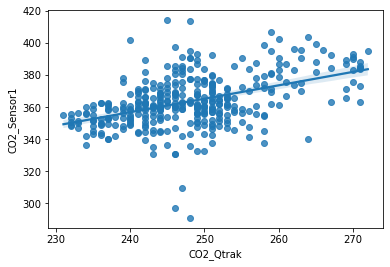

In [30]:
sns.regplot(x='CO2_Qtrak', y='CO2_Sensor1',data=df_CO2_1,)